Q3:

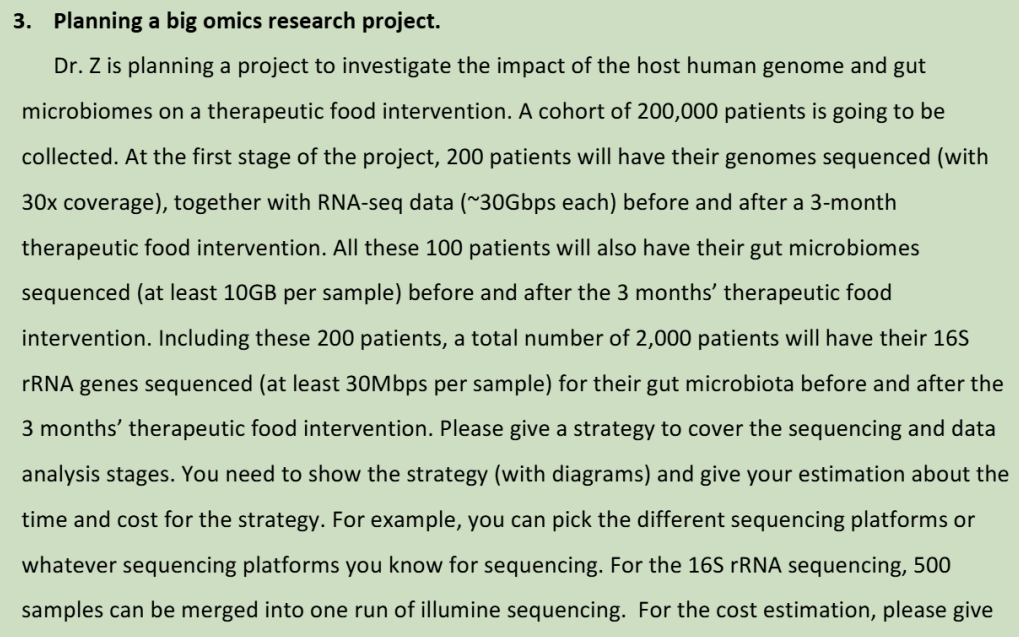

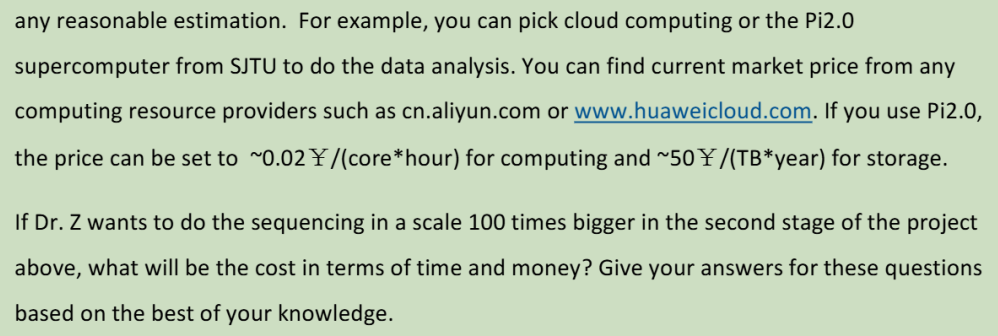

In [2]:
pip install mermaid-py

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mermaid as md

Z博士正在计划一个项目，研究宿主人类基因组和肠道微生物群对治疗性食物干预的影响。

一个20万患者的队列将被收集起来。

在项目的第一阶段，200名患者将在3个月的治疗性食物干预之前和之后进行基因组测序（覆盖30倍），以及RNA-seq数据（每个约30Gbps）。

在3个月的治疗性食物干预之前和之后，所有这100名患者还将进行肠道微生物组测序（每个样本至少10GB）。

包括这200例患者，总共2,000例患者将在3个月的治疗性食物干预之前和之后进行肠道微生物的16S rRNA基因测序（每个样本至少30Mbps）。

请给出一个涵盖测序和数据分析阶段的策略。你需要展示这个策略（用图表），并给出你对这个策略的时间和成本的估计。例如，你可以选择不同的测序平台或任何你知道的测序平台。

对于16S rRNA测序，500个样本可以合并到一次illumine测序中。

对于成本估算，请给出合理的估算。例如，您可以选择云计算或上海交通大学的Pi2.0超级计算机来进行数据分析。您可以从任何计算资源提供商，如cn.aliyun.com或www.huaweicloud.com找到当前的市场价格。如果你使用Pi2.0，价格可以设定为~0.02￥/（核心*小时）计算和~50￥/（TB*年）存储。

如果Z博士想在上述项目的第二阶段做100倍规模的测序，在时间和金钱方面的成本是多少？根据你最好的知识来回答这些问题。

1，测序阶段策略

主要是各个测序平台的比较，本质上就是benchmark

（1）基因组测序 ：WGS、WES



DNA测序平台比较：

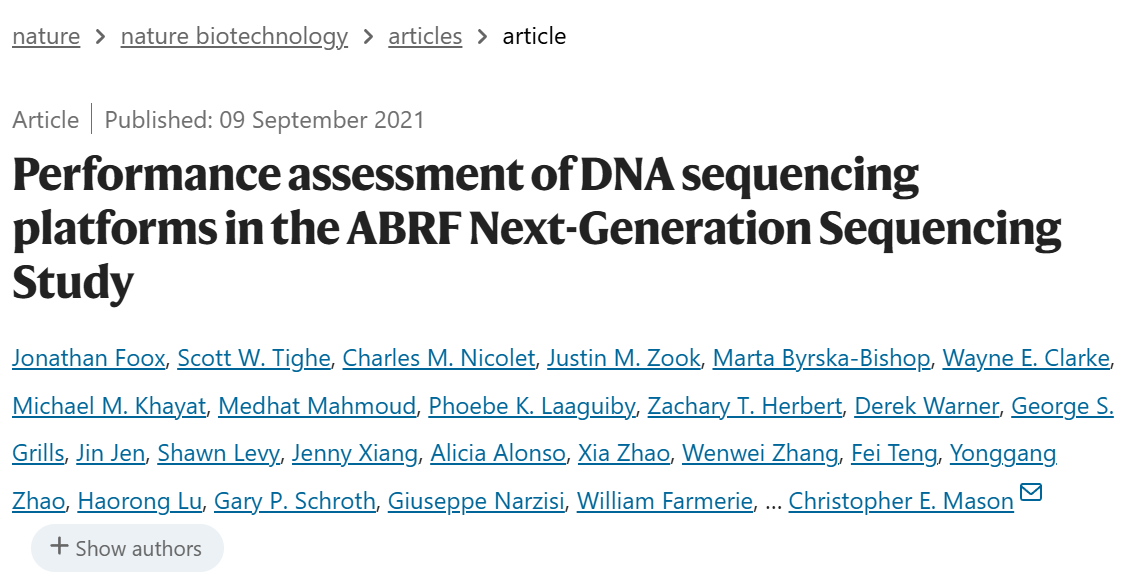

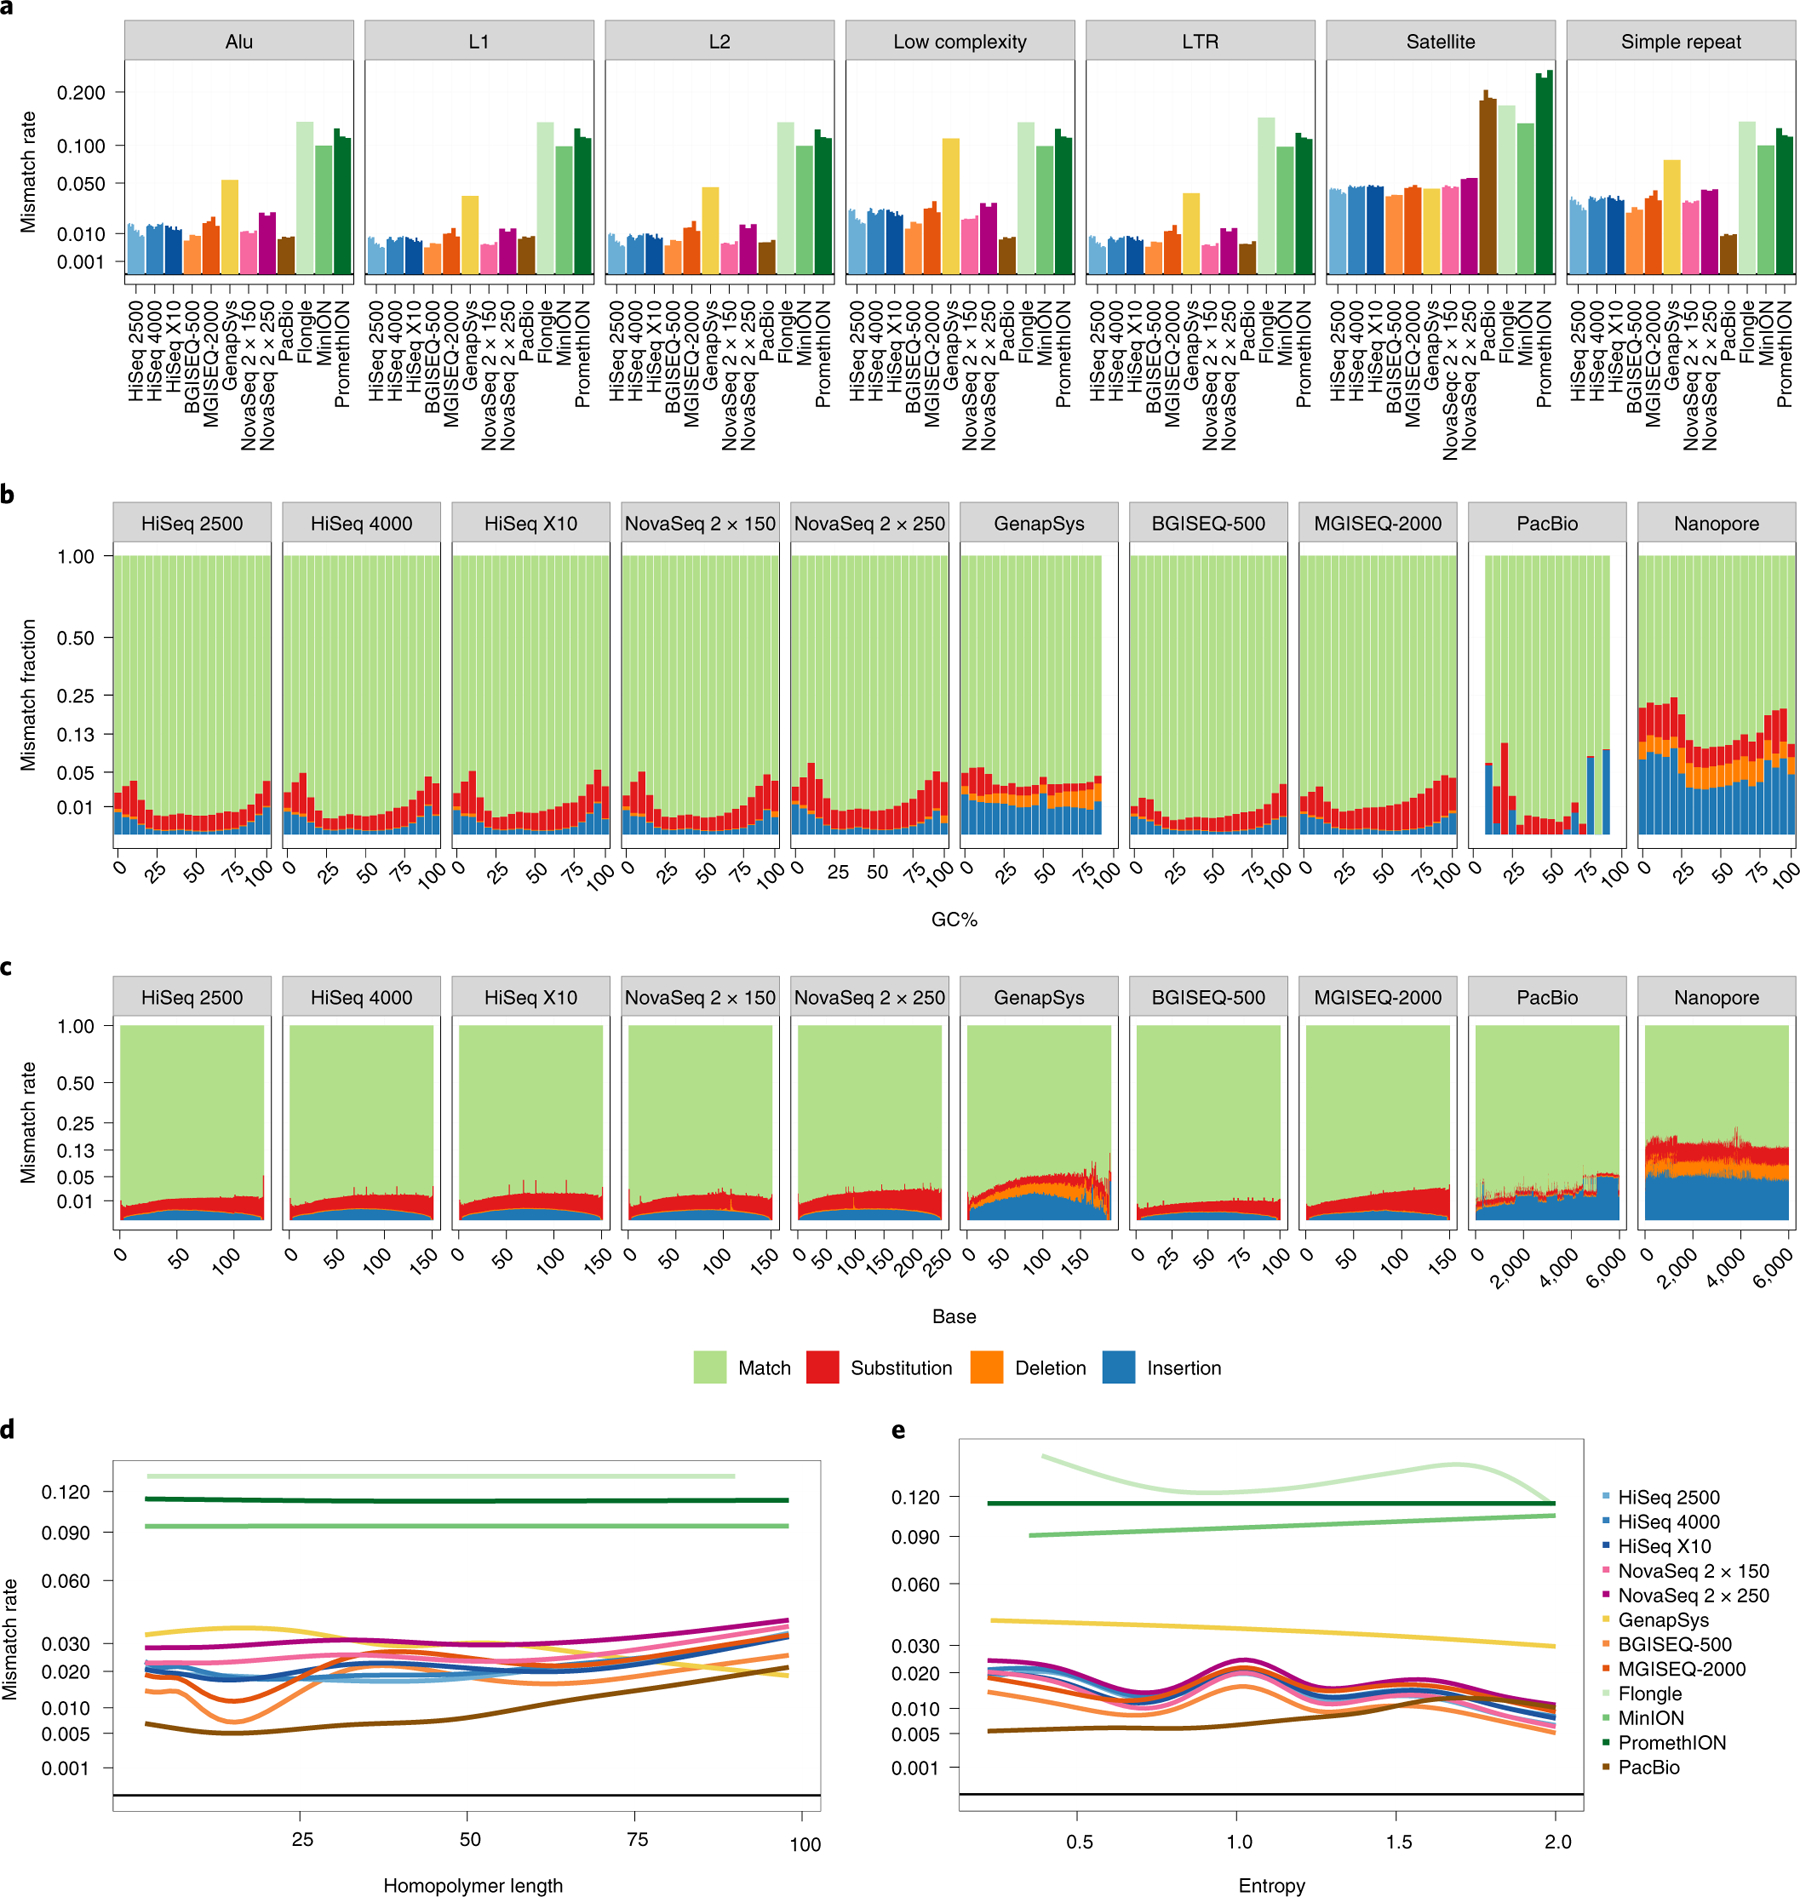

ref文献:Performance assessment of DNA sequencing platforms in the ABRF Next-Generation Sequencing Study

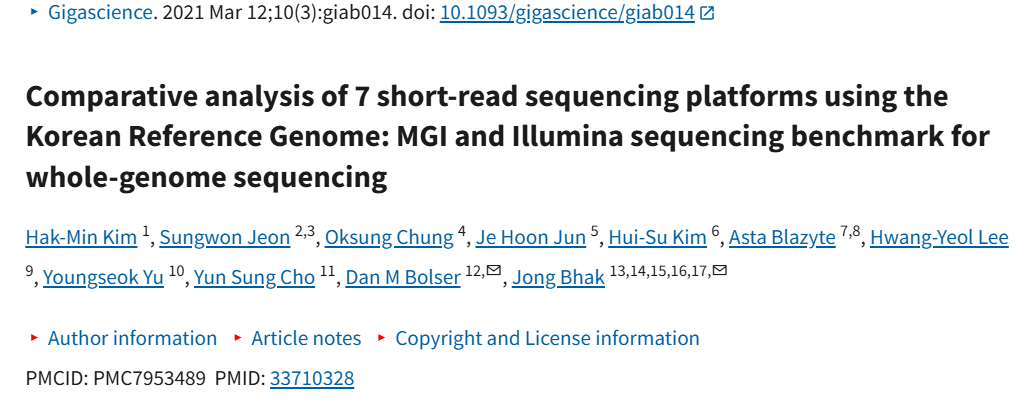

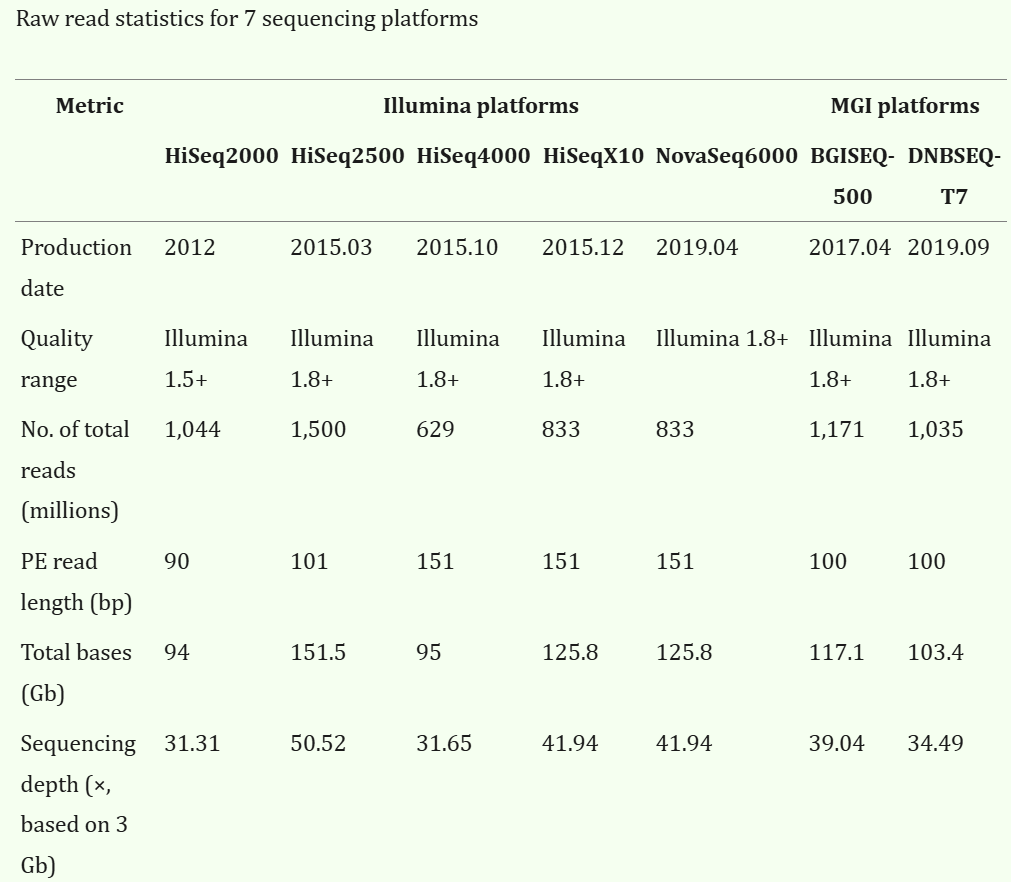  

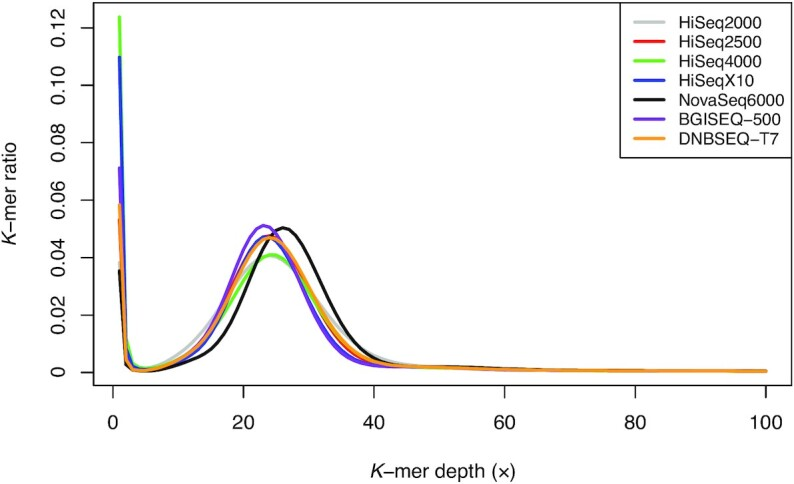

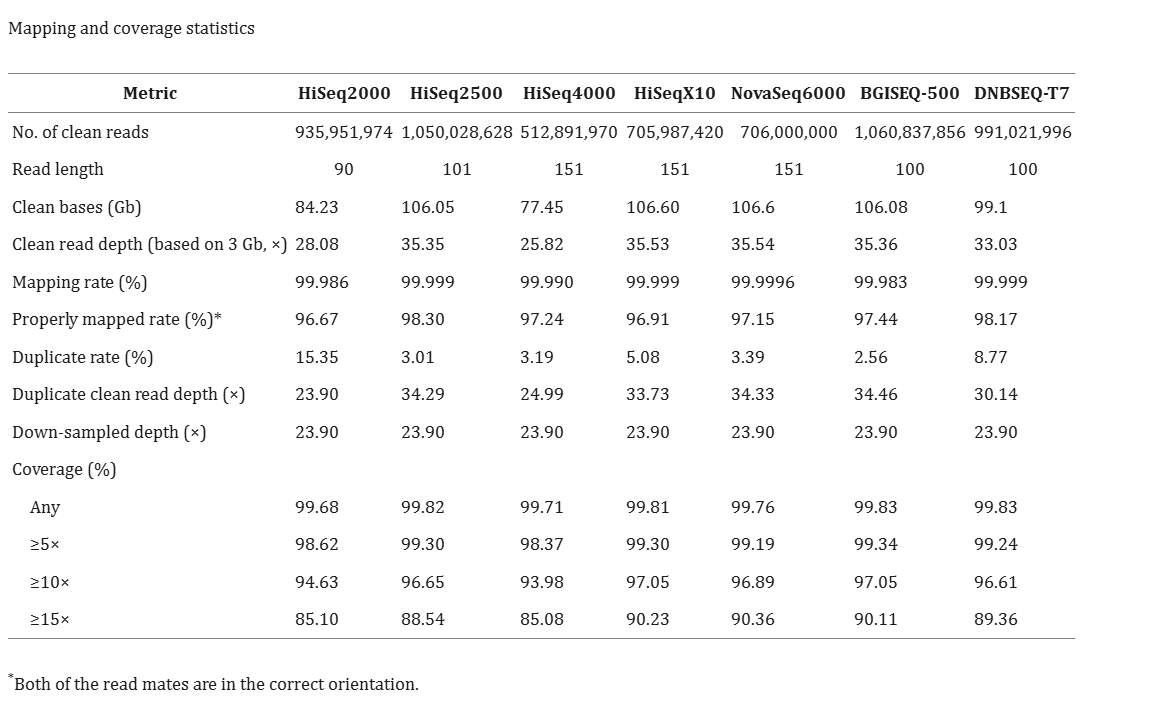

关于该测序平台的官网指标：

参考：https://en.mgi-tech.com/products/instruments_info/5/

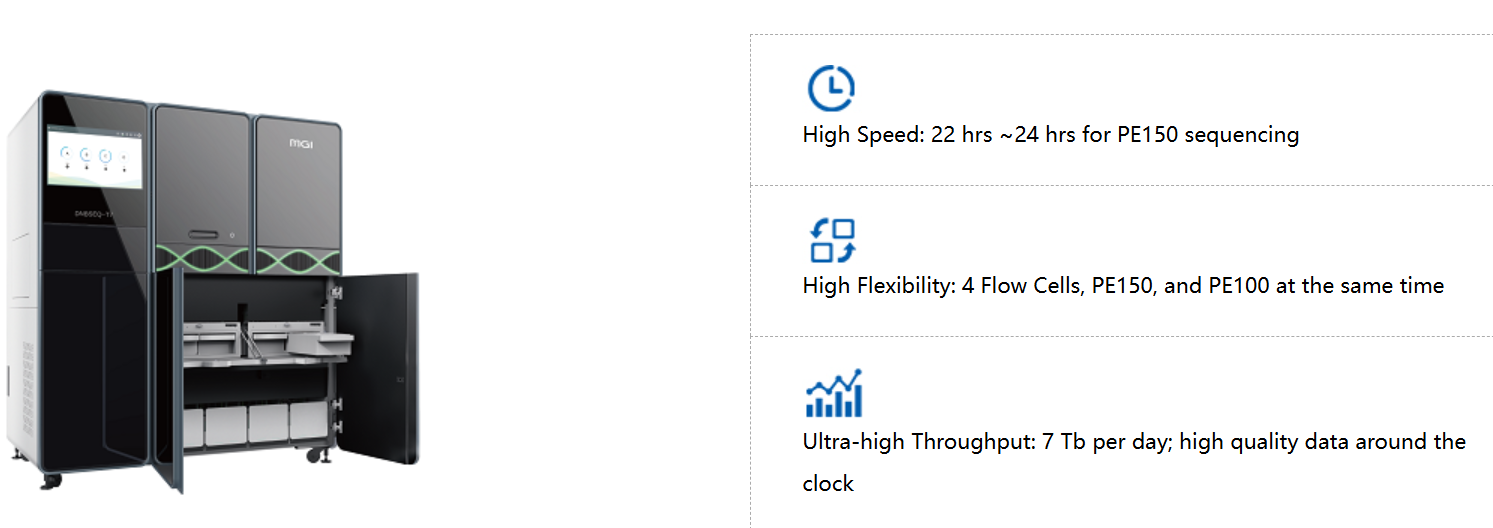   

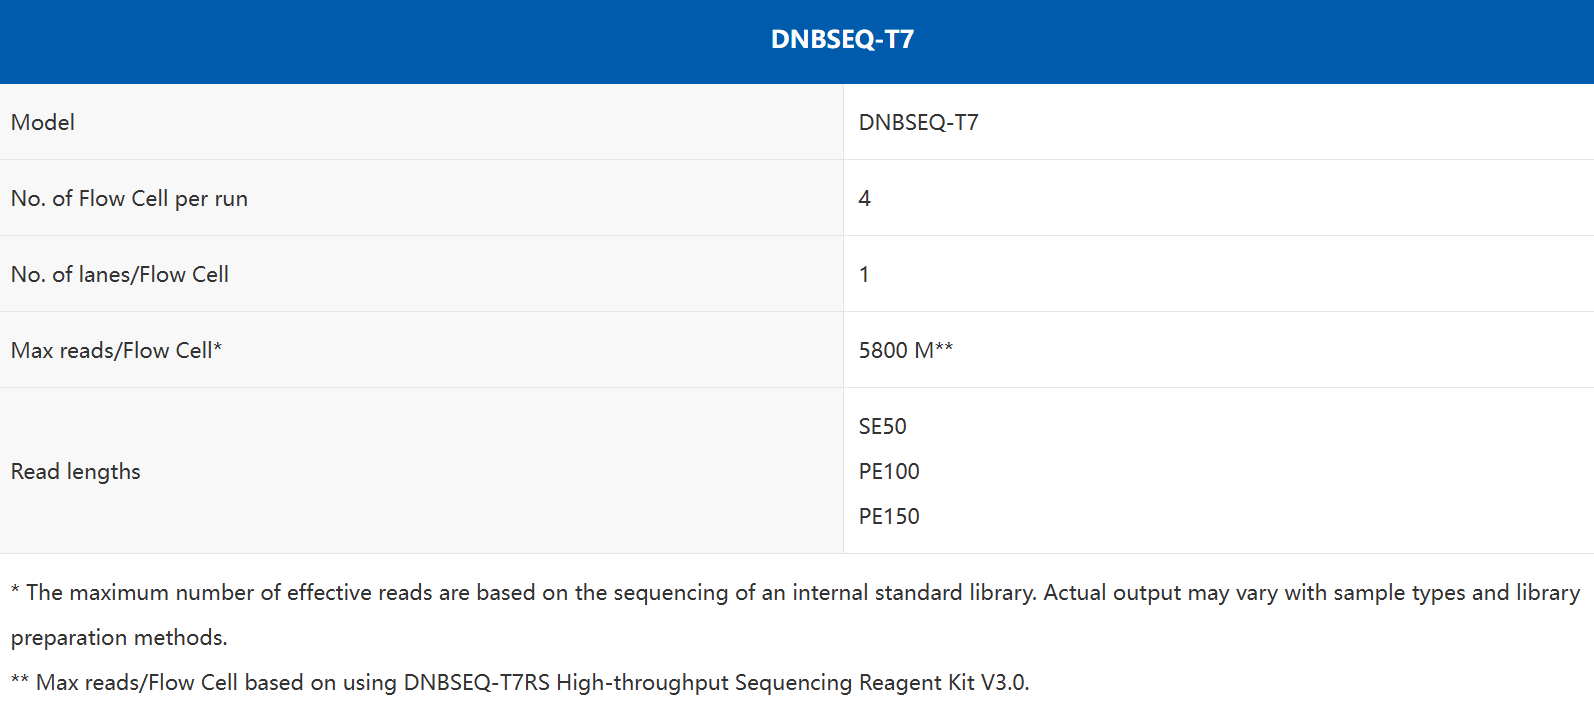

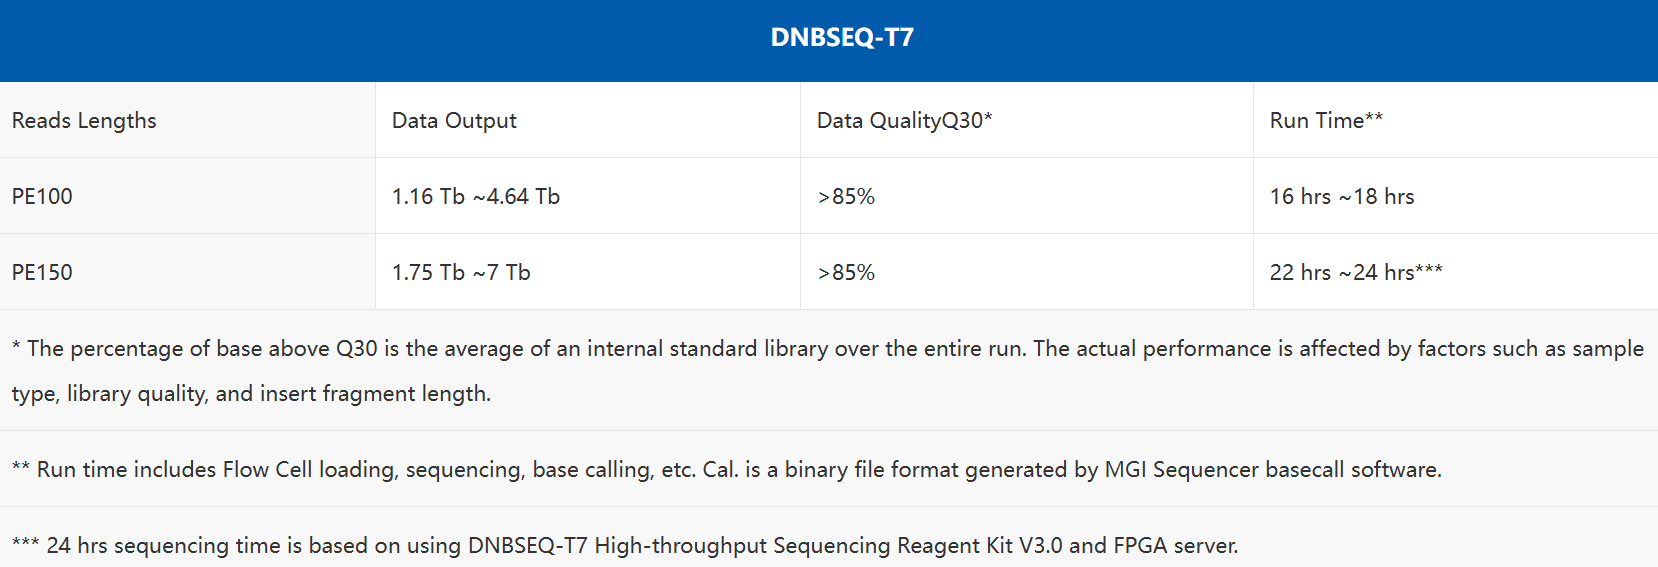

测序平台主要是国内华大BGI的以及国外的Illumina：     

对于 200 例患者基因组测序（30x 覆盖度），可选择华大的 DNBSEQ-T7 平台，其具有高通量和相对较低的成本，能在较短时间内完成大量样本的测序。

根据样本数量和覆盖度要求，估算所需的测序芯片数量和时间。

200 例患者每例约需 90Gb 数据（基于人类基因组大小约 3Gb，30x 覆盖度），总共约需 18Tb 数据（粗略估计，1024转换略）


根据官网内容，DNBSEQ-T7测序仪的性能参数如下：
- **单次运行最大数据量**：7 Tb（使用PE150测序模式，基于V3.0试剂套装）。
- **运行时间**：22小时至24小时（PE150模式）。

### 时间估计
1. **总数据需求**：200例患者 × 90 Gb/例 = 18 Tb。
2. **单次运行数据量**：7 Tb。
3. **所需运行次数**：18 Tb ÷ 7 Tb/次 ≈ 2.57次，向上取整为3次。
4. **总运行时间**：3次 × 24小时/次 = 72小时（假设每次运行时间均为24小时，且不考虑中间停机时间）。——》当然我们可以并行，此处计算的是“总运行机时”

（2）RNA-seq 转录组测序

转录组测序 ：对于 200 例患者的 RNA-seq 数据（每例约 30Gbps），同样可采用华大的 DNBSEQ-T7 平台（也可以做转录组测序）。

### 时间估计
1. **总数据需求**：200例患者 × 30 Gb/例 = 6 Tb。
2. **单次运行数据量**：7 Tb。
3. **所需运行次数**：6 Tb ÷ 7 Tb/次 ，向上取整为1次。
4. **总运行时间**：1次 × 24小时/次 = 24小时（假设每次运行时间均为24小时，且不考虑中间停机时间）。

（3）肠道微生物组测序：宏基因组

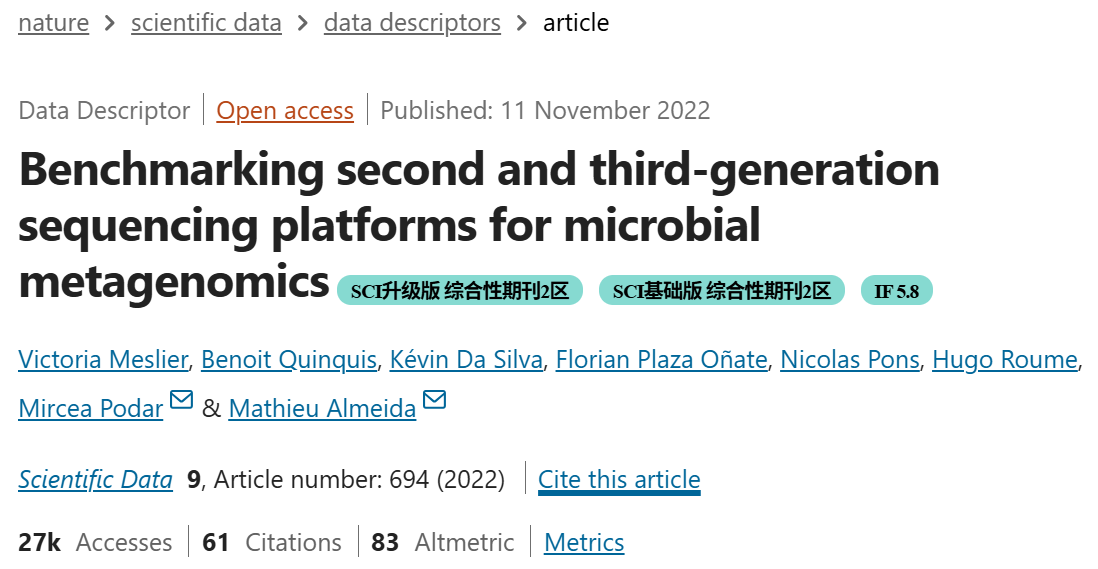

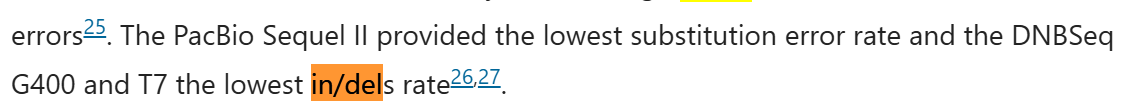

对于宏基因组测序的数据，也同样可以使用该平台，保持一致（也算是个批次效应），

### 时间估计
1. **总数据需求**：100例患者 × 10 Gb/例 = 1 Tb。（题目中说的是100例患者，我觉得可能说错了，应该还还是200名患者，毕竟干预前后应该都要做一次测序收集数据，所以人数应该都是统一的，其他的就是统一的）
2. **单次运行数据量**：7 Tb。
3. **所需运行次数**：1 Tb ÷ 7 Tb/次 ，向上取整为1次。（如果是200名患者，实际上还是可以在一次运行中完成，所以时间成本还是1天）
4. **总运行时间**：1次 × 24小时/次 = 24小时（假设每次运行时间均为24小时，且不考虑中间停机时间）。

(4) 16s rRNA测序：

如果还是使用华大的平台的话，可以使用CycloneSEQ-WT02，这个是纳米孔测序，属于是三代测序范畴了，前面几个组学使用的都是成熟的二代测序平台；

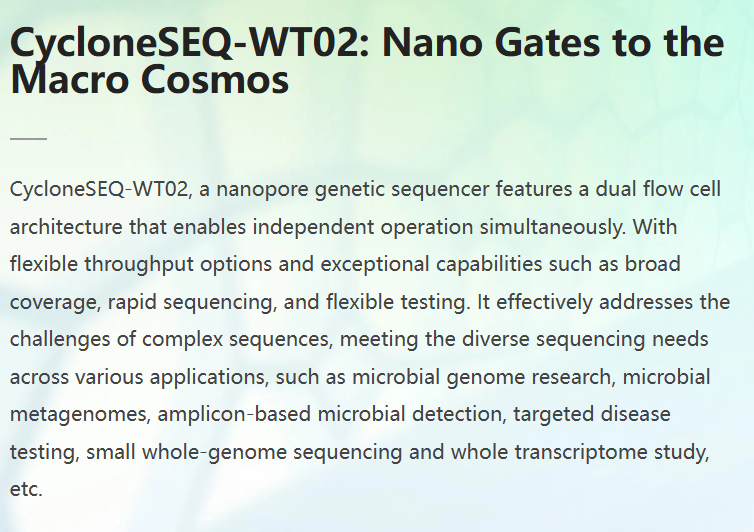

参考：https://en.mgitech.cn/Home/Products/instruments_info/id/65.html

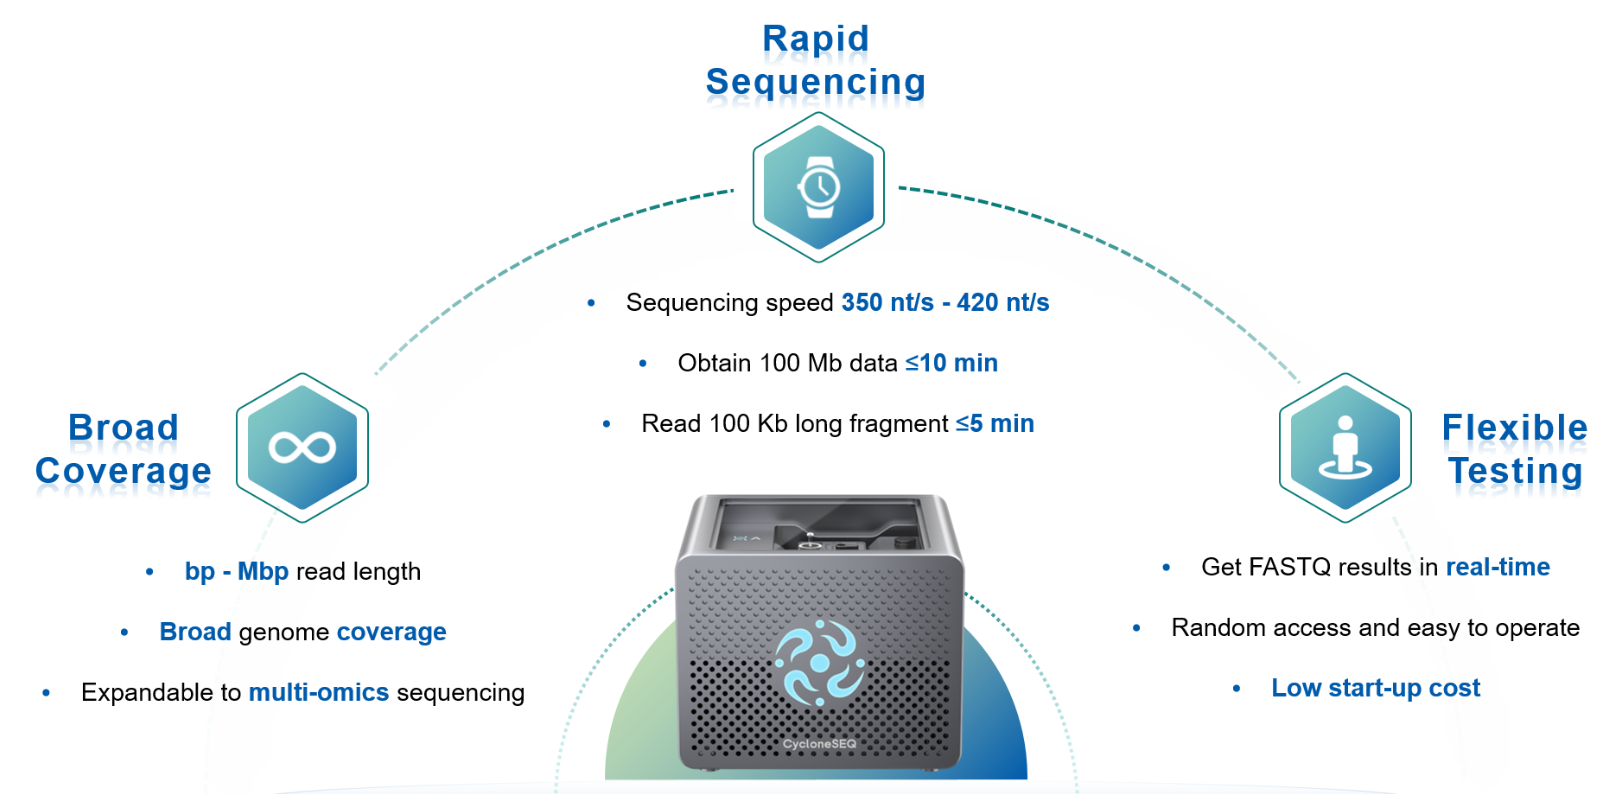

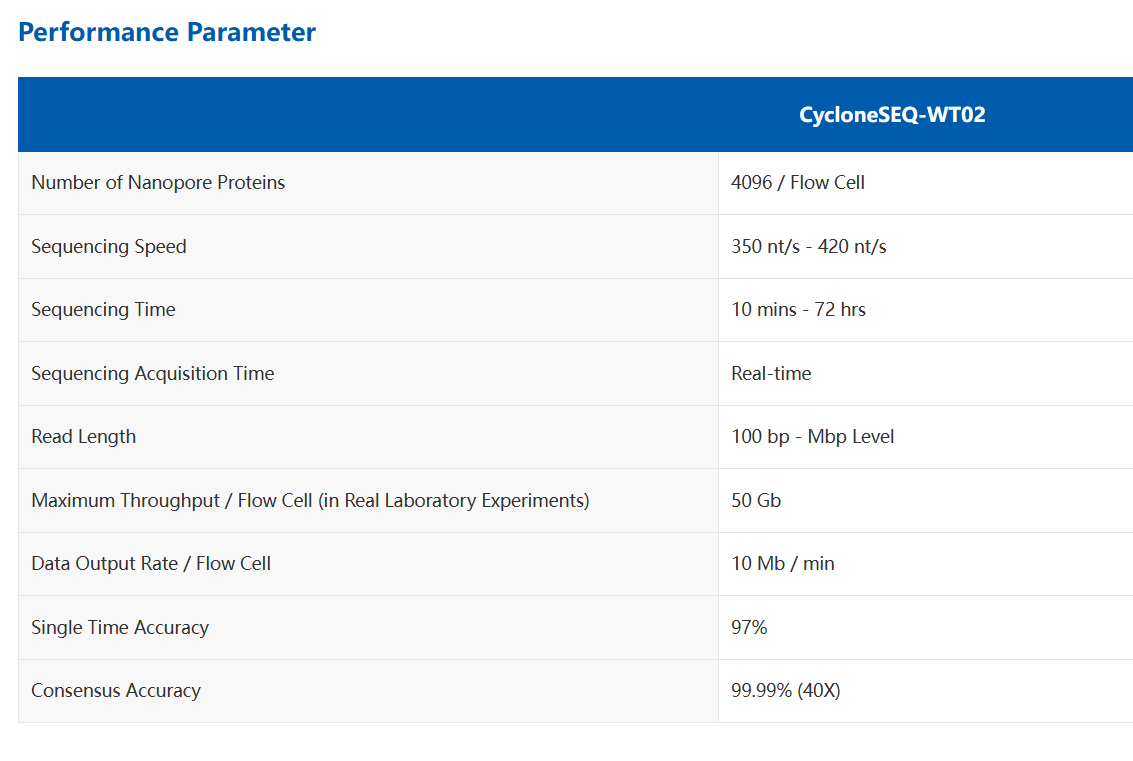

如果还是使用二代测序平台的话，华大的暂时没找到，可以使用Illumina测序平，

参考：https://www.illumina.com.cn/areas-of-interest/microbiology/microbial-sequencing-methods/16s-rrna-sequencing.html

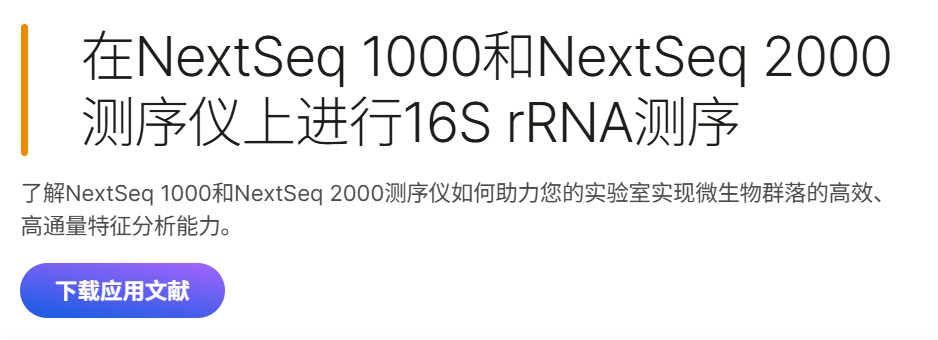

可以使用NextSeq 2000测序平台

对于16s rRNA扩增子测序的数据，我们可以使用华大的三代测序平台：

### 时间估计
1. **总数据需求**：2000例患者 × 0.03 Gb/例 = 0.06 Tb = 60 Gb。
2. **单次运行数据量**：50 Gb。我们主要看最大数据吞吐量的运行时间效率，比如说官网这里说每个flow cell可以输出10Mb/min，主要是看100Mb/10mins的水平
3. **所需运行次数**：60 Gb ÷ 10 Mb/min = 100 h
4. **总运行时间**：该机器最大运行时间为72h，也就是3天，所以我们需要分开数据运行，串行2次或者并行，总之100h，大约5天左右，我们计算的是总运行机时

# 综上：

总时间成本：测序要在3个月前后都测一遍，所以是2次成本；

单次成本的话：

全基因组测序72h，转录组测序24h，肠道微生物宏基因组24h（无论题目中说是这100例还是200例），扩增子测序100h，单次总共是220h，也就是10天机时

总共前后3个月的话，就是440h，也就是20天机时

如果是开销成本的话：

没找到明确的测序开销成本，但是测序仪器的成本倒是能够查到，无法估计，用测序平台的仪器，但是送测任务会依据承包商上下波动

对于二代二序平台：也就是DNBSEQ-T7

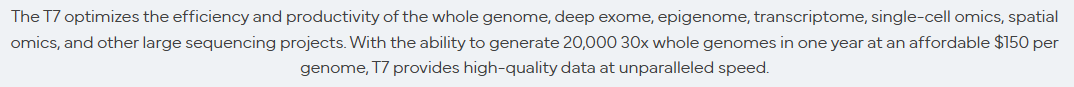

成本上是每个基因组150美元，

按照现在的美元-人民币汇率：取1美元=7.19人民币

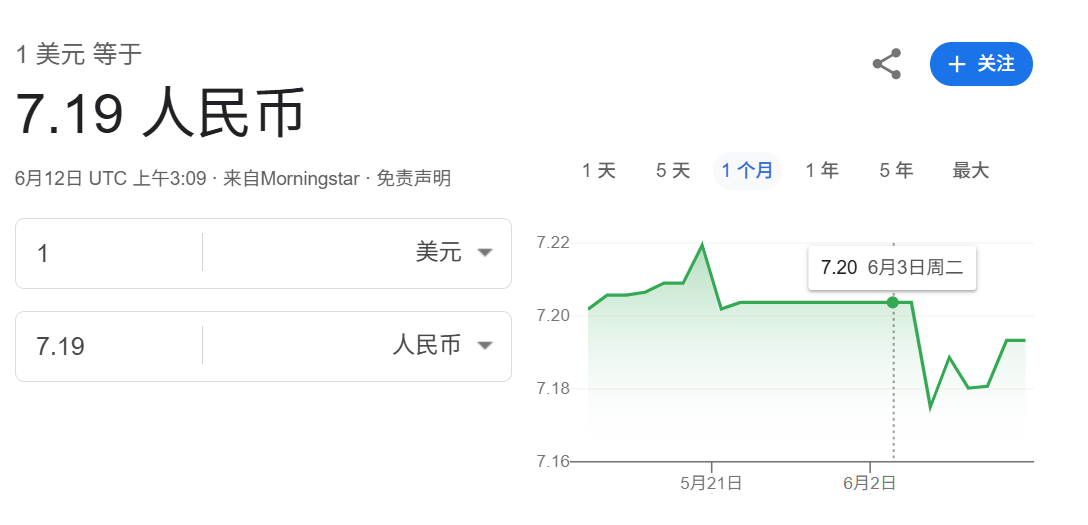

我们按照数据量来看，如果每个基因组3G就是150美元(50美元/G)的话，那么前面使用二代测序平台的数据量一共有：（200x30x3+200x30+100x10+2000x0.03）x 2 = 50120 G, 50T左右的数据量
 
50120*50 = 2506000美元

参考：http://completegenomics.com/products/sequencing-platforms/dnbseq-t7/

对于三代测平台，也就是

参考：https://mgi-whatif.com/eoypromo2024

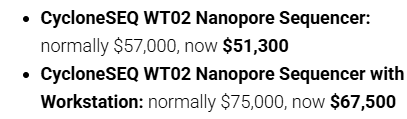

我们可以使用前面next-seq 2000的价格来估计，参考https://genohub.com/ngs-sequencer/7/illumina-nextseq-1000/2000/

我们不买仪器，就送测，粗略估计成本就在测序成本上下：

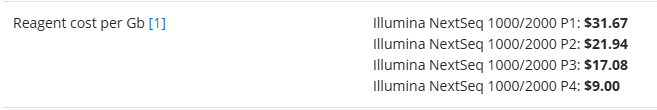

大概79.69美元/G数据，扩增子测序数据量在60Gx2上，所以是9562.8美元

综上粗略估计2515562.8美元，约合18086896.531999998人民币，即1800万人民币左右



2，数据分析阶段

测序阶段的成本估计：

时间成本还是消费成本，实际上就是看测序平台（测序仪器的数据吞吐量决定运行时间，运行时间决定消费成本）；

数据分析阶段的成本估计：

这里应该是在大数据规模下，进行1个时间复杂度的分析，涉及到超算计算任务运行收费；另外还有空间复杂度的分析，因为冷存储也要收费，冷存储的时间成本看实验周期也就是项目周期跨度；


（1）基因组测序：WGS/WES

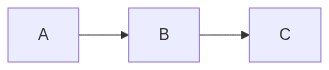

In [6]:
%%mermaidjs # with --img flag in case your notebook doesn't render HTML
flowchart LR
    A-->B
    B-->C

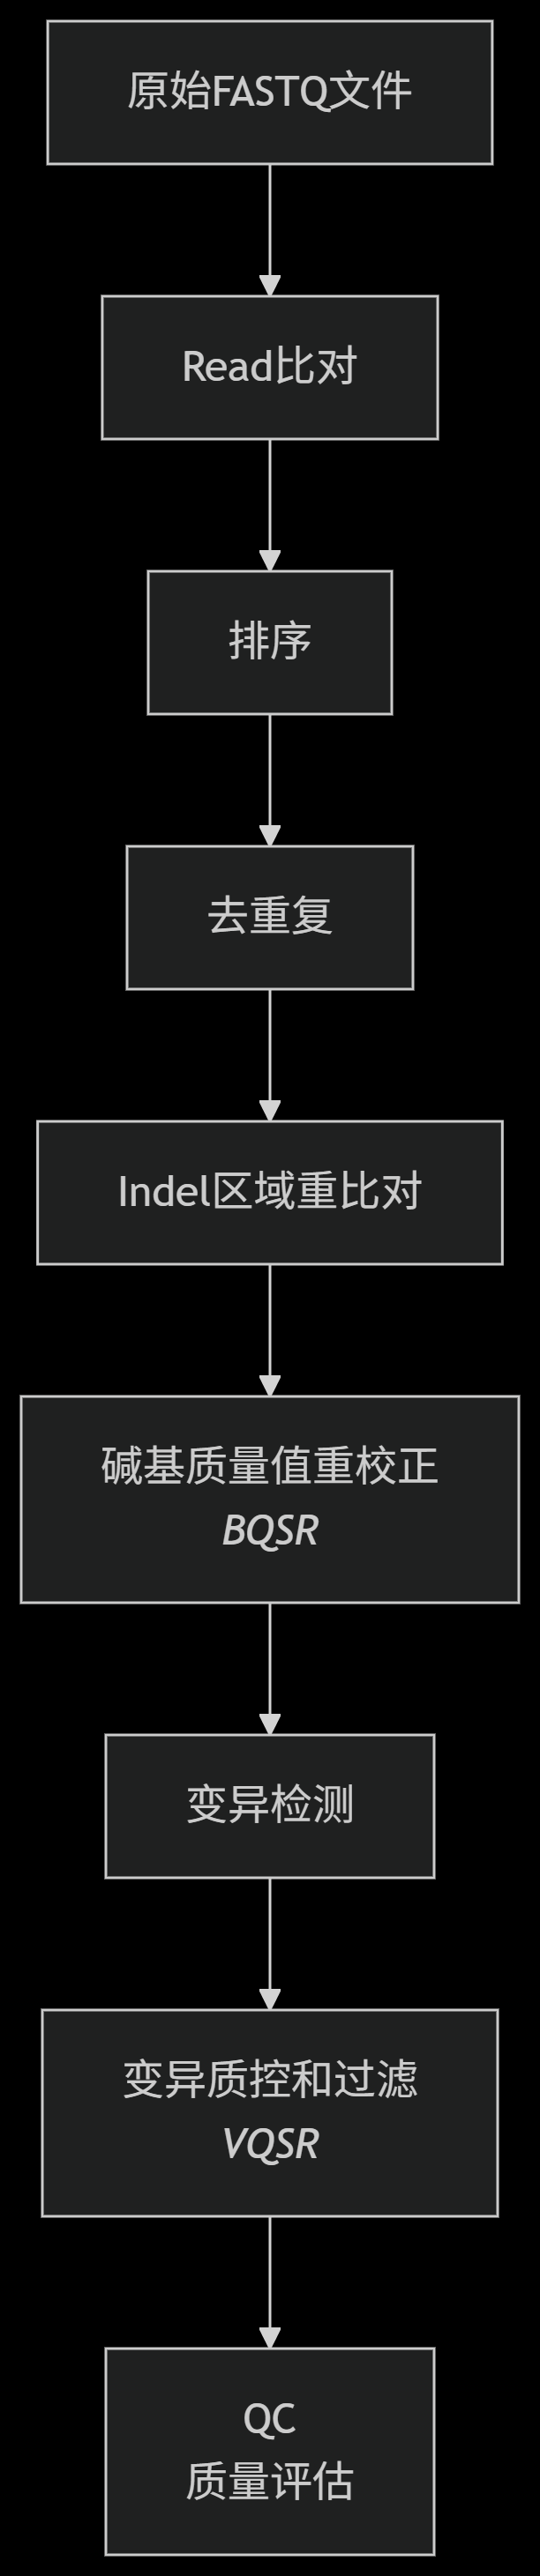

In [8]:
%%mermaidjs
graph TD
    A[原始FASTQ文件] --> B[Read比对]
    B --> C[排序]
    C --> D[去重复]
    D --> E[Indel区域重比对]
    E --> F[碱基质量值重校正<br/><i>BQSR</i>]
    F --> G[变异检测]
    G --> H[变异质控和过滤<br/><i>VQSR</i>]
    H --> I[QC<br/>质量评估]

WGS中变异检测，其实用到最多的工具大概就是bcftools和GATK套件了

bcftools：https://samtools.github.io/bcftools/

GATK：https://gatk.broadinstitute.org/hc/en-us

原始FASTQ：测序仪器下机的原始数据文件

Read比对：将测序片段比对到参考基因组（常用BWA/Bowtie2）

排序：按染色体坐标排序（常用samtools sort）

去重复：移除PCR重复序列（常用Picard MarkDuplicates/samtools也有rmdup类似子命令）

Indel区域重比对：优化插入/缺失区域比对（GATK RealignerTargetCreator）

BQSR：碱基质量值重校正，即Base (Quality Score) Recalibration （GATK BaseRecalibrator）

变异检测：识别SNP/InDel（GATK HaplotypeCaller/bcftools mpileup+call）

VQSR：基于机器学习模型的变异过滤，即Variant Quality Score Recalibration，VQSR 不会对原来的质量分数值进行校正，而是将 QUAL 列中的分值没有考虑的各项与变异相关的属性纳入其中，重新计算一个新的质量分数 VQSLOD （GATK VariantRecalibrator）

QC：最终结果的质量评估（Qualimap/MultiQC/或者是常用的fastp那些）

（2）bulk RNA-seq

In [ ]:
%%mermaidjs
graph TD
    A[Quality Control] -->|FastQC, fastp| B[Reads Mapping]
    B -->|Unspliced:<br>BWA, Bowtie, Bowtie2| C[SAM/BAM Files]
    B -->|Spliced:<br>STAR, TopHat, Hisat2| C
    C -->|Viewed by IGV| D[Expression Quantification]
    D -->|Summarize counts:<br>featureCounts| E[DE Testing]
    D -->|FPKM/RPKM:<br>HTseq| E
    E -->|DESeq2, edgeR| F[Functional Interpretation]
    E -->|Cuffdifff| F
    F -->|Function enrichment| G[Biological Insights]
    F -->|Infer networks| G
    F -->|Data integration| G

In [4]:
%%mermaidjs
graph TD
    A[Quality Control<br/>FastQC, fastp] -->|clean reads| B(Reads Mapping)
    B -->|Unspliced alignment<br/>BWA, Bowtie, Bowtie2| C{SAM/BAM Files}
    B -->|Spliced alignment<br/>STAR, TopHat, Hisat2| C
    C -->|IGV visualization| D[[Expression Quantification]]
    D -->|Count summarization<br/>featureCounts| E[(DE Testing)]
    D -->|FPKM/RPKM calculation<br/>HTseq| E
    E -->|Statistical analysis<br/>DESeq2, edgeR| F>Functional Interpretation ]
    E -->|Alternative method<br/>Cuffdiff| F
    F -->|Enrichment analysis| G((Biological Insights))
    F -->|Network inference| G
    F -->|Multi-omics integration| G
    
    classDef qcClass fill:#e1f5fe,stroke:#01579b,stroke-width:3px
    classDef mappingClass fill:#f3e5f5,stroke:#4a148c,stroke-width:3px
    classDef quantClass fill:#e8f5e8,stroke:#1b5e20,stroke-width:3px
    classDef deClass fill:#fff3e0,stroke:#e65100,stroke-width:3px
    classDef funcClass fill:#fce4ec,stroke:#880e4f,stroke-width:3px
    classDef insightClass fill:#f1f8e9,stroke:#33691e,stroke-width:3px
    
    class A qcClass
    class B mappingClass
    class C,D quantClass
    class E deClass
    class F funcClass
    class G insightClass

（3）肠道微生物组测序/宏基因组测序

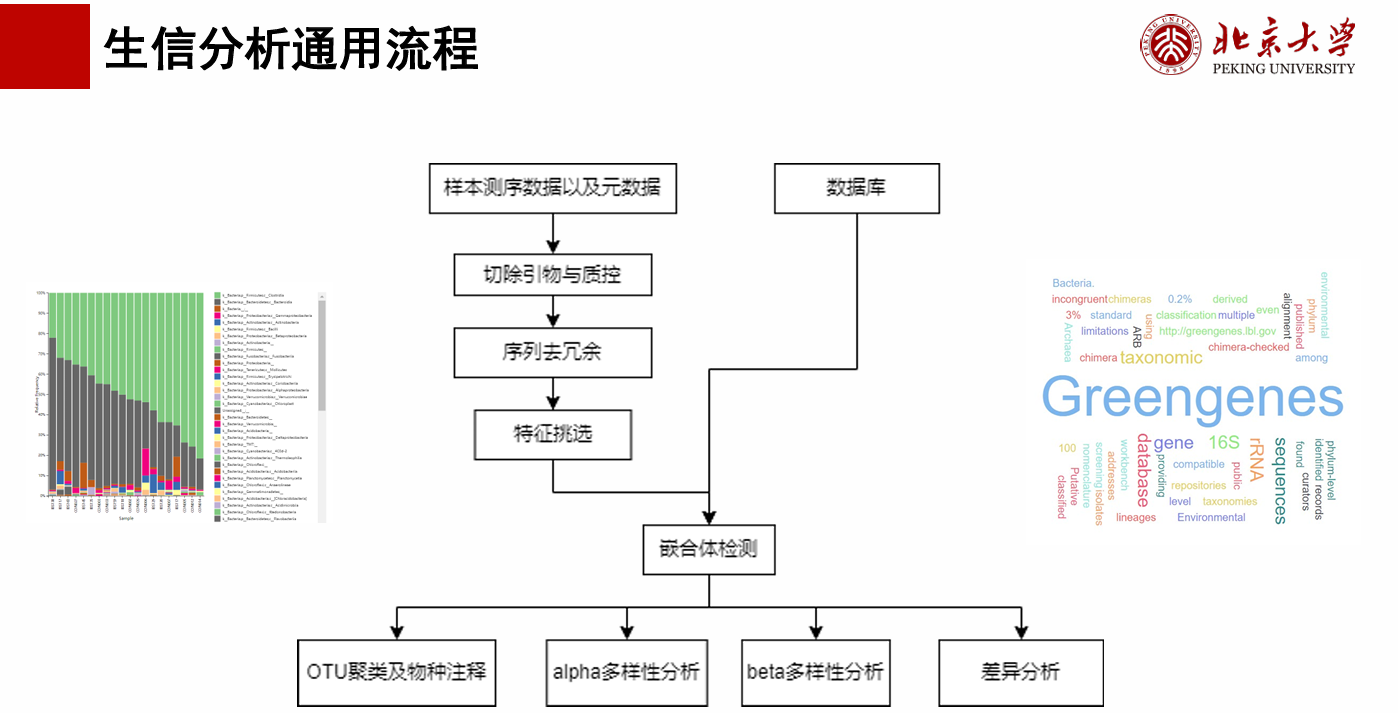

参考：http://abc.cbi.pku.edu.cn/seminar/PKU22_G07.pdf

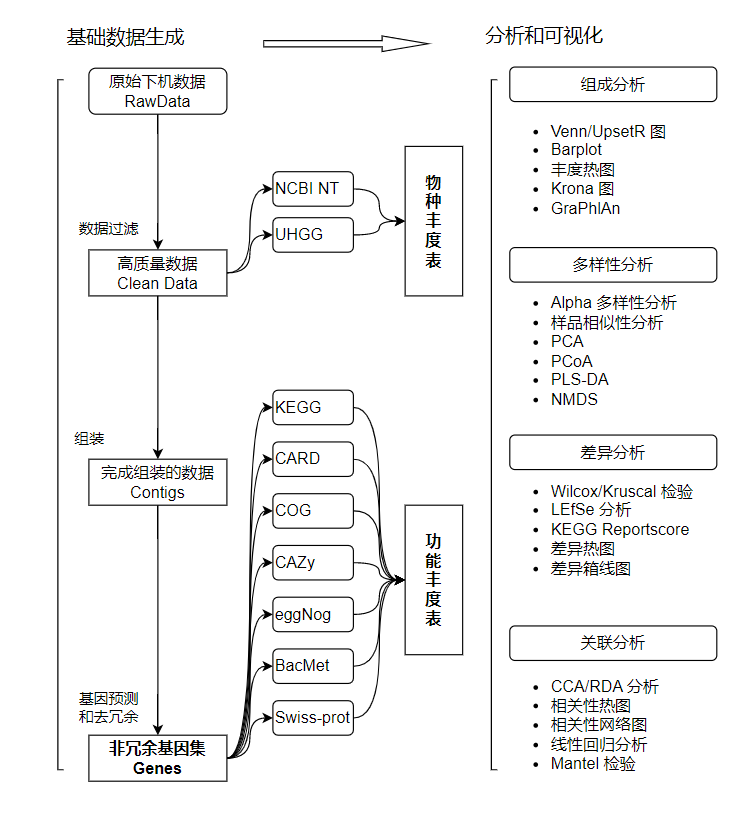

参考：https://biosys.bgi.com/help/metagenomics/analytic/1-1-general-intro.html#%E7%94%9F%E4%BF%A1%E5%88%86%E6%9E%90%E6%B5%81%E7%A8%8B

* read 质控和去宿主：使用 SOAPnuke 软件对原始数据进行过滤质控，使用 Bowtie2 比对宿主序列并去除比中的序列，生成 Clean Data。
* 功能注释：先使用 MEGAHIT 对完成质控和去宿主的序列进行基于 k-mer 的组装，生成 contigs，再用 MetaGeneMark 软件，预测 contigs 中的基因序列。使用 CD-HIT 软件，对得到的基因进行去冗余，使用 Salmon 软件统计各个基因相对丰度表，再使用 DIAMOND 或 RGI 将非冗余基因比对到 eggNOG、KEGG、BacMet、CARD、COG、CAZy、Swiss-prot 等数据库，完成基因功能注释。
* 物种注释：使用 Kraken2 和自建数据库（筛选 NCBI NT 数据库或 UHGG 数据库）比对来计算样品中所含有物种的序列数，再用 Bracken2 来对样品中物种的实际丰度进行估计，完成物种注释。
* 基于基因丰度表、物种丰度表和功能丰度表，可以对基因、物种和功能分布情况进行可视化，计算其 Alpha 多样性、Beta 多样性，进行物种或功能丰度聚类分析，PCA、PLSDA、PCoA 和 NMDS 降维分析，样品聚类分析，使用 Wilcoxon/Kruscal，T 检验/方差分析、LEfSe 分析以及 KEGG 通路富集分析（Reportscore 方法）挖掘样品之间的物种组成和功能组成差异。
* 结合环境因子、病理指标或特殊表型进行深入关联研究，能够为进一步深入研究和利用样品的物种和功能提供理论依据。

（4）16s rRNA测序

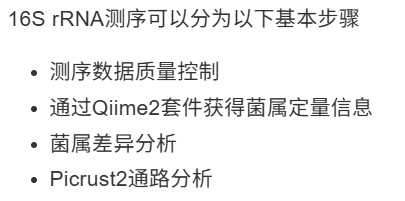

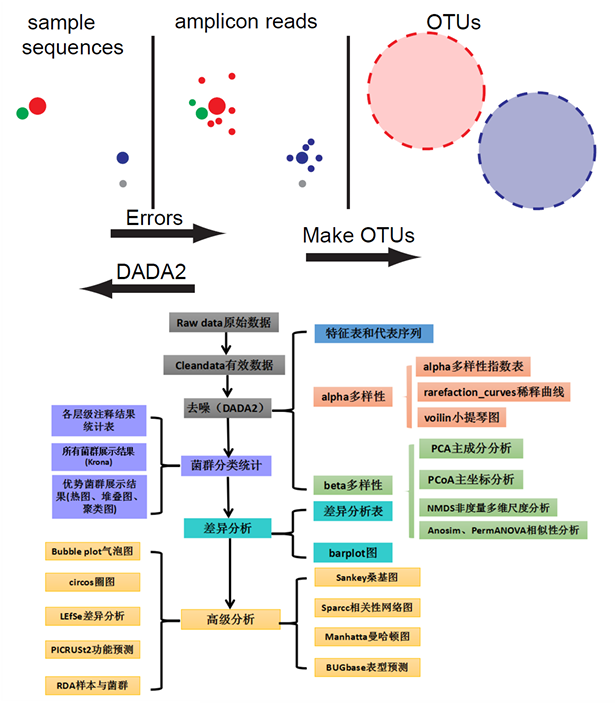

参考：https://www.omicstudio.cn/ueditor/php/upload/file/20200430/59416S%20rDNA%E6%B5%8B%E5%BA%8F%E5%88%86%E6%9E%90%E6%8A%A5%E5%91%8A%E4%B8%AD%E6%96%87%E5%B7%A5%E4%B8%9A%E7%89%88.pdf

计算核时消费需要实际数据操作，做小规模数据集测试，再用时间复杂度评估时间，另外涉及到CPU 资源按核时收费，GPU 资源按卡时收费；

交我算平台集群总费用为CPU，GPU和存储费用之和；

存储费用看数据规模，见前计算出来粗略50120G，即粗略50.12T（其中1024各种转换略），每TB每年50元；

总体来说3个月前后测序，前面说机时20天运行机时，粗略估计4个月stage1，当然数据还要分析、写文投递改稿，时间会更长；

4个月的话，50*50.12/3=835.3333333333334，

stage2的话，再扩大100倍，机时如果并行的话，只是存储83533.33333333334，也得8.35万左右

实际时间会是季度的n倍，按年来算